In [1]:
# Dependencies
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import openweathermapy.core as owm
import seaborn as sns
import csv
#https://openweathermap.org/current

In [2]:
# Load API Key
from config import api_key
# Import citipy to determine city based on latitude and longitude
from citipy import citipy
# Setting Location Path To Export CSV
file_export = "/Users/carolineteti/Desktop/weather_challenge/city_data.csv"

In [3]:
# Set Ranges for Lat and Lng according to Standard
lat_range = (-90,90)
lng_range = (-180,180)

In [4]:
# List for Data Storage
lat_lngs = []
cities = []
# Setting Up to Collect Random Pairing of Lat and Lng
# Tie together with Zip
import random 
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats,lngs)
# Identifying the Name of Nearest City for each: 
# Lat, Lng Random Combination by Setting up a For Loop
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    # If the city is missing from our cities list, append or add
    if city not in cities:
        cities.append(city)
# Printing City Count for Verification >500
len(cities)

767

In [5]:
# Source URL for Weather MAP API Calls
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
# Setting up List to Store City Data
city_data = []
# Printing + Fetching
print("City_Data is Fe†ching Key Information, Please Wait")
print("---------------IN BUNDLES OF 100------------------")
# Counter for Next Step
number_count = 1
bundle_count = 1
# Looping through all the cities in list WITH counter and enumerate 
# "It allows us to loop over something and have an automatic counter"
for i, city in enumerate(cities):
    # Pairing city data in groups/bundles of 100 for convenience in further use
    if(i % 100 == 0 and i >= 100):
        bundle_count += 1
        number_count = 0    
    # URL for API call
    city_url = url + "appid=" + api_key + "&q=" + city
    # Printing URL after API call and Chronicalling My Records as "Processing" with
    # Details for Fetching Data
    print("Fetching: No. %s of Bundle %s | %s" % (number_count, bundle_count, city))
    print(city_url)
    # Add 1 to Record_Count
    number_count += 1
    # Run on API request for each of the cities
    try:
        # Store Data into JSON
        city_weather = requests.get(city_url).json()
        # Querying temp_max, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Appending the City information into city_data "list"
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Prompt to Skip City if There is an Error
    except:
        print("City is not found. Please Ignore.")
        pass
# Showing when Proccess is Completed
print("---------------------------------")
print("City_Data is Successfully Fetched")
print("---------------------------------")

City_Data is Fe†ching Key Information, Please Wait
---------------IN BUNDLES OF 100------------------
Fetching: No. 1 of Bundle 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=albany
Fetching: No. 2 of Bundle 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rikitea
Fetching: No. 3 of Bundle 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mataura
Fetching: No. 4 of Bundle 1 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=egvekinot
Fetching: No. 5 of Bundle 1 | mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mayo
Fetching: No. 6 of Bundle 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saskylakh
Fetc

Fetching: No. 53 of Bundle 1 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bilma
Fetching: No. 54 of Bundle 1 | rabo de peixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rabo de peixe
Fetching: No. 55 of Bundle 1 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sao joao da barra
Fetching: No. 56 of Bundle 1 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ancud
Fetching: No. 57 of Bundle 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=butaritari
Fetching: No. 58 of Bundle 1 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=avarua
Fetching: No. 59 of Bundle 1 | busselton
http://api.openweathermap.org/d

Fetching: No. 4 of Bundle 2 | llangefni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=llangefni
Fetching: No. 5 of Bundle 2 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mys shmidta
City is not found. Please Ignore.
Fetching: No. 6 of Bundle 2 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grindavik
Fetching: No. 7 of Bundle 2 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saldanha
Fetching: No. 8 of Bundle 2 | bargal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bargal
City is not found. Please Ignore.
Fetching: No. 9 of Bundle 2 | speightstown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=speightstown
Fetching: No

Fetching: No. 58 of Bundle 2 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cockburn town
Fetching: No. 59 of Bundle 2 | beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=beyneu
Fetching: No. 60 of Bundle 2 | daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=daru
Fetching: No. 61 of Bundle 2 | krasnoarmeysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=krasnoarmeysk
Fetching: No. 62 of Bundle 2 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ponta do sol
Fetching: No. 63 of Bundle 2 | novobelokatay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=novobelokatay
Fetching: No. 64 of Bundle 2 | comodoro rivadavia
http://api.o

Fetching: No. 11 of Bundle 3 | umm lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=umm lajj
Fetching: No. 12 of Bundle 3 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=te anau
Fetching: No. 13 of Bundle 3 | punta alta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta alta
Fetching: No. 14 of Bundle 3 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cayenne
Fetching: No. 15 of Bundle 3 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grand river south east
City is not found. Please Ignore.
Fetching: No. 16 of Bundle 3 | hutchinson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hutchinson
Fetching: No. 17 of Bu

Fetching: No. 64 of Bundle 3 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=xining
Fetching: No. 65 of Bundle 3 | burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=burica
City is not found. Please Ignore.
Fetching: No. 66 of Bundle 3 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bandarbeyla
Fetching: No. 67 of Bundle 3 | santa marta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=santa marta
Fetching: No. 68 of Bundle 3 | astoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=astoria
Fetching: No. 69 of Bundle 3 | khorixas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=khorixas
Fetching: No. 70 of Bundle 3 | saint-felicien
http:/

Fetching: No. 18 of Bundle 4 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sao filipe
Fetching: No. 19 of Bundle 4 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kavieng
Fetching: No. 20 of Bundle 4 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=carutapera
Fetching: No. 21 of Bundle 4 | ashtian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ashtian
Fetching: No. 22 of Bundle 4 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tuatapere
Fetching: No. 23 of Bundle 4 | sringeri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sringeri
Fetching: No. 24 of Bundle 4 | nuuk
http://api.openweathermap.org/data/2.5/weather

Fetching: No. 72 of Bundle 4 | karanganom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=karanganom
Fetching: No. 73 of Bundle 4 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=port elizabeth
Fetching: No. 74 of Bundle 4 | soderhamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=soderhamn
Fetching: No. 75 of Bundle 4 | marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=marystown
Fetching: No. 76 of Bundle 4 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-augustin
Fetching: No. 77 of Bundle 4 | okulovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=okulovka
Fetching: No. 78 of Bundle 4 | mkokotoni
http://api.open

Fetching: No. 26 of Bundle 5 | harnosand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=harnosand
Fetching: No. 27 of Bundle 5 | merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=merauke
Fetching: No. 28 of Bundle 5 | pedernales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pedernales
Fetching: No. 29 of Bundle 5 | west wendover
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=west wendover
Fetching: No. 30 of Bundle 5 | dalvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dalvik
Fetching: No. 31 of Bundle 5 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=la ronge
Fetching: No. 32 of Bundle 5 | asau
http://api.openweathermap.org/data/2.5/wea

Fetching: No. 79 of Bundle 5 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=acajutla
Fetching: No. 80 of Bundle 5 | manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=manokwari
Fetching: No. 81 of Bundle 5 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=samalaeulu
City is not found. Please Ignore.
Fetching: No. 82 of Bundle 5 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=geraldton
Fetching: No. 83 of Bundle 5 | chaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chaman
Fetching: No. 84 of Bundle 5 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kenai
Fetching: No. 85 of Bundle 5 | manggar
http://api.openwe

Fetching: No. 32 of Bundle 6 | maua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maua
Fetching: No. 33 of Bundle 6 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tabiauea
City is not found. Please Ignore.
Fetching: No. 34 of Bundle 6 | oxapampa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=oxapampa
Fetching: No. 35 of Bundle 6 | knysna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=knysna
Fetching: No. 36 of Bundle 6 | ronda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ronda
Fetching: No. 37 of Bundle 6 | jalingo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=jalingo
Fetching: No. 38 of Bundle 6 | waldoboro
http://api.openweathermap.org/dat

Fetching: No. 86 of Bundle 6 | gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gorontalo
Fetching: No. 87 of Bundle 6 | moen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=moen
Fetching: No. 88 of Bundle 6 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kununurra
Fetching: No. 89 of Bundle 6 | kletskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kletskaya
Fetching: No. 90 of Bundle 6 | manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=manta
Fetching: No. 91 of Bundle 6 | wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wilmington
Fetching: No. 92 of Bundle 6 | sangar
http://api.openweathermap.org/data/2.5/weather?units=I

Fetching: No. 40 of Bundle 7 | kishtwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kishtwar
Fetching: No. 41 of Bundle 7 | cheney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cheney
Fetching: No. 42 of Bundle 7 | heihe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=heihe
Fetching: No. 43 of Bundle 7 | vientiane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vientiane
Fetching: No. 44 of Bundle 7 | trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=trelew
Fetching: No. 45 of Bundle 7 | murgab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=murgab
Fetching: No. 46 of Bundle 7 | bairiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&app

Fetching: No. 93 of Bundle 7 | karauzyak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=karauzyak
City is not found. Please Ignore.
Fetching: No. 94 of Bundle 7 | tutoia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tutoia
Fetching: No. 95 of Bundle 7 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gat
Fetching: No. 96 of Bundle 7 | warrensburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=warrensburg
Fetching: No. 97 of Bundle 7 | bowen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bowen
Fetching: No. 98 of Bundle 7 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=beringovskiy
Fetching: No. 99 of Bundle 7 | bougouni
http://api.openwea

Fetching: No. 45 of Bundle 8 | ust-ilimsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ust-ilimsk
Fetching: No. 46 of Bundle 8 | pittsfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pittsfield
Fetching: No. 47 of Bundle 8 | innisfail
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=innisfail
Fetching: No. 48 of Bundle 8 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=attawapiskat
City is not found. Please Ignore.
Fetching: No. 49 of Bundle 8 | muravlenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=muravlenko
Fetching: No. 50 of Bundle 8 | macomb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=macomb
Fetching: No. 51 of Bundle 8 | novob

In [44]:
# Translating JSON into Pandas Dataframe for Plotting
city_data_pd = pd.DataFrame(city_data)
# Calling for Data Pertaining to Relationships to be Plotted/Analyzed
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
# Exporting PD into CSV for Storage
city_data_pd.to_csv("/Users/carolineteti/Desktop/weather_challenge/city_data.csv", index_label="City_ID")
# Confirming PD Count
city_data_pd.count()

City          688
Cloudiness    688
Country       688
Date          688
Humidity      688
Lat           688
Lng           688
Max Temp      688
Wind Speed    688
dtype: int64

In [45]:
# Printing the City_Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,90,US,1529880360,88,42.65,-73.75,73.40,13.87
1,rikitea,0,PF,1529880883,100,-23.12,-134.97,75.99,13.42
2,mataura,92,NZ,1529880884,100,-46.19,168.86,40.44,16.44
3,egvekinot,36,RU,1529880884,69,66.32,-179.17,46.74,6.71
4,mayo,90,CA,1529877600,87,63.59,-135.90,57.20,3.36


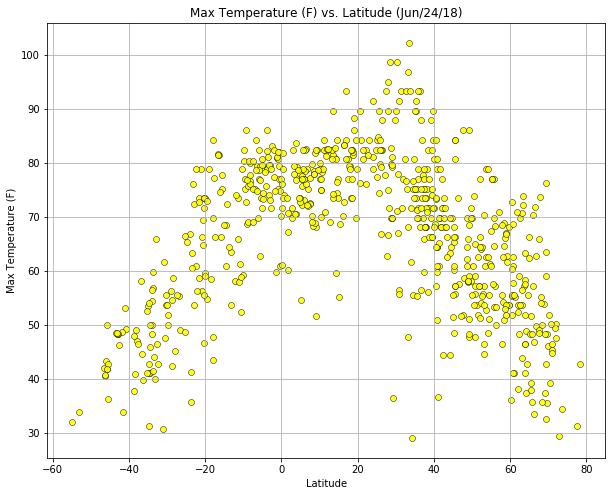

In [114]:
import time
# latitude vs. temperature, making sure titles match those in DF
fig1 = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(lats,
            max_temps,
            color="yellow",
            edgecolor="black",
            linewidths=.5,
            marker="o",
            alpha=0.9,
            label="Cities")

plt.title("Max Temperature (F) vs. Latitude (%s)" % time.strftime("%b/%d/%y"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.show()
plt.savefig("/Users/carolineteti/Desktop/weather_challenge/FIGURE1.png")
plt.close(fig1)

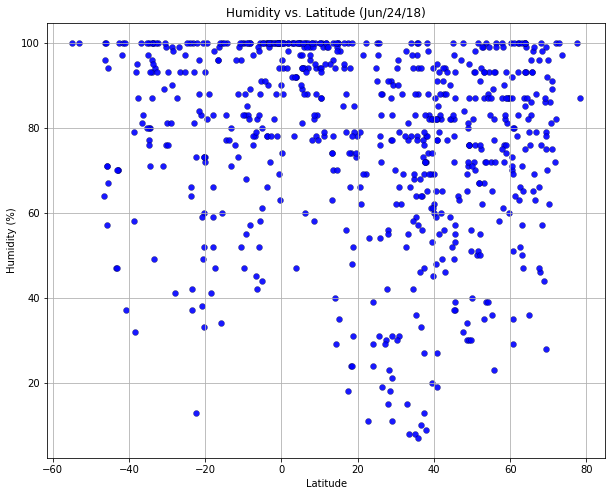

In [115]:
# latitude vs. humidity plot
fig2 = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="black", 
            linewidths=.25, 
            marker="o", 
            alpha = 0.9,
            label="Cities")

plt.title("Humidity vs. Latitude (%s)" % time.strftime("%b/%d/%y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.show()
plt.savefig("/Users/carolineteti/Desktop/weather_challenge/FIGURE2.png")
plt.close(fig2)

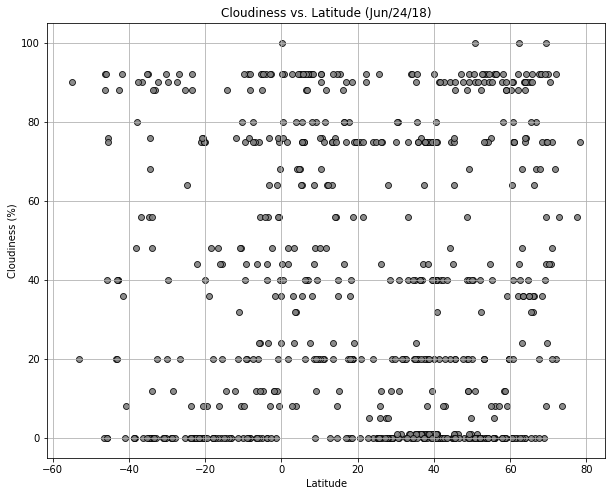

In [116]:
# latitude vs. cloudiness plot
fig3 = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(lats,
            cloudiness,
            color="grey", 
            edgecolor="black", 
            linewidths=.85, 
            marker="o", 
            alpha = 0.9,
            label="Cities")

plt.title("Cloudiness vs. Latitude (%s)" % time.strftime("%b/%d/%y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.show()
plt.savefig("/Users/carolineteti/Desktop/weather_challenge/FIGURE3.png")
plt.close(fig3)

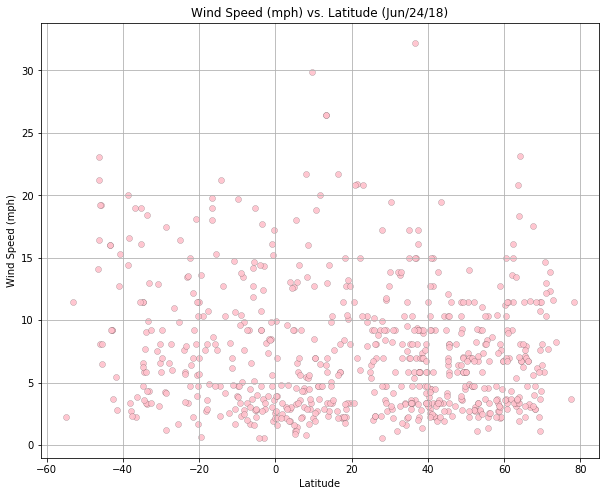

In [118]:
#latitude vs. wind speed plot
fig4 = plt.figure(figsize=(10,8))
plt.grid(True)

plt.scatter(lats,
            wind_speed,
            color="pink",
            edgecolor="black",
            linewidths=.15,
            marker="o",
            alpha=0.9,
            label="Cities")

plt.title("Wind Speed (mph) vs. Latitude (%s)" % time.strftime("%b/%d/%y"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.show()
plt.savefig("/Users/carolineteti/Desktop/weather_challenge/FIGURE4.png")
plt.close(fig4)